In [21]:
#following along the youtube tutorial: https://www.youtube.com/watch?v=BiS-uKoK5GY

#Start of Step 1 of tutorial, Setup: 

import os
import pandas as pd

#set path to the file of the github repo --> finder, right click on openbiomechanics, option, copy path
path_github_repo = "/Users/leofeingold/Documents/GitHub/openbiomechanics"

#change the directory to the repo path
os.chdir(path_github_repo)

#list the diectory
os.listdir()

['.DS_Store',
 'computer_vision',
 'imgs',
 'additional_resources',
 'README.md',
 'baseball_hitting',
 '.gitignore',
 'CONTRIBUTING.md',
 'binaries',
 'baseball_pitching',
 '.git',
 'license.txt',
 'tutorial.ipynb',
 'SECURITY.md']

In [22]:
#set path to baseball pitching folder
os.listdir('baseball pitching')


['imgs', 'code', 'README.md', 'data']

In [23]:
#set path to baseball pitching data
pitching_data_path = os.path.join('baseball_pitching', 'data')

os.listdir(pitching_data_path)

['full_sig', 'poi', 'c3d', 'metadata.csv']

In [29]:
#read in the metadata.csv
with open(os.path.join(pitching_data_path, 'metadata.csv'), 'r') as f:
    metadata = pd.read_csv(f)

#end of Step 1 of tutorial, Setup


     user  session session_pitch  session_mass_kg  session_height_m  age_yrs  \
0     750     1031        1031_2         110.6784            1.9304    21.40   
1     750     1031        1031_3         110.6784            1.9304    21.40   
2     774     1097        1097_1         101.1528            1.9304    19.41   
3     774     1097        1097_2         101.1528            1.9304    19.41   
4     774     1097        1097_3         101.1528            1.9304    19.41   
..    ...      ...           ...              ...               ...      ...   
406   870     3252        3252_1          88.4520            1.8796    20.38   
407   870     3252        3252_2          88.4520            1.8796    20.38   
408   870     3252        3252_3          88.4520            1.8796    20.38   
409   870     3252        3252_4          88.4520            1.8796    20.38   
410   870     3252        3252_5          88.4520            1.8796    20.38   

    playing_level  pitch_speed_mph     

In [30]:
#start of Step 2 of tutorial, Explore Metadata CSV

#list metadata headers
metadata.head()


,user,session,session_pitch,session_mass_kg,session_height_m,age_yrs,playing_level,pitch_speed_mph,filename_new,modelname_new
0,750,1031,1031_2,110.6784,1.9304,21.40,college,90.4,000750_001031_76_244_013_FF_904.c3d,000750_001031_model.c3d
1,750,1031,1031_3,110.6784,1.9304,21.40,college,90.4,000750_001031_76_244_014_FF_904.c3d,000750_001031_model.c3d
2,774,1097,1097_1,101.1528,1.9304,19.41,college,77.6,000774_001097_76_223_001_FF_776.c3d,000774_001097_model.c3d
3,774,1097,1097_2,101.1528,1.9304,19.41,college,77.0,000774_001097_76_223_005_FF_770.c3d,000774_001097_model.c3d
4,774,1097,1097_3,101.1528,1.9304,19.41,college,76.1,000774_001097_76_223_006_FF_761.c3d,000774_001097_model.c3d


In [32]:
#print metadata columns
print(metadata.columns)

Index(['user', 'session', 'session_pitch', 'session_mass_kg',
       'session_height_m', 'age_yrs', 'playing_level', 'pitch_speed_mph',
       'filename_new', 'modelname_new'],
      dtype='object')


In [33]:
#print metadata shape

metadata.shape

(411, 10)

In [36]:
#find the number of users, sessions and trials
num_users = len(metadata['user'].unique())
num_sessions = len(metadata['session'].unique())
num_trials = len(metadata['session_pitch'].unique())
print(f"We have {num_trials} trials from {num_sessions} sessions and {num_users} users.")

We have 411 trials from 100 sessions and 100 users.


In [39]:
#Exercise: find the average age, height and weight of a pitcher in the data

ave_age = metadata['age_yrs'].mean()
ave_height = metadata['session_height_m'].mean()
ave_weight = metadata['session_mass_kg'].mean()

print(f"Average Age: {ave_age}, Average Height (meters): {ave_height}, Average Weight (kilograms): {ave_weight}")

#End of Step 2 of tutorial, Explore Metadata CSV

Average Age: 21.29107055961071, Average Height (meters): 1.8514189781021897, Average Weight (kilograms): 90.28957664233577


In [45]:
#Start of Step 3 of tutorial, Explore Point of Interest (POI) CSV

#Identify path to POI CSV
path_poi = os.path.join(pitching_data_path, 'poi')

#access poi data
with open(os.path.join(path_poi, 'poi_metrics.csv'), 'r') as f:
    poi = pd.read_csv(f)

In [46]:
# Show poi headers
poi.head()

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,...,rear_grf_z_max,rear_grf_mag_max,rear_grf_angle_at_max,lead_grf_x_max,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,...,1497.9859,1736.0368,55.7071,1278.4966,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,...,1502.8258,1728.0176,60.2863,1436.1255,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,...,1094.7686,1283.0751,58.3164,957.3923,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,...,1187.5810,1354.7150,58.7397,860.3796,280.5177,1715.1864,1864.0488,66.6789,6.4897,54.3727
4,1097_3,1097,R,FF,76.1,3970.7971,2497.6253,1110.4850,28.9909,124.8308,...,1214.0065,1425.2124,58.0297,1066.6047,337.4227,2120.4510,2283.1749,65.9014,7.2019,106.2719


In [47]:
#print poi columns:
print(poi.columns)

Index(['session_pitch', 'session', 'p_throws', 'pitch_type', 'pitch_speed_mph',
       'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo',
       'max_torso_rotational_velo', 'max_rotation_hip_shoulder_separation',
       'max_elbow_flexion', 'max_shoulder_external_rotation',
       'elbow_flexion_fp', 'elbow_pronation_fp',
       'rotation_hip_shoulder_separation_fp',
       'shoulder_horizontal_abduction_fp', 'shoulder_abduction_fp',
       'shoulder_external_rotation_fp', 'lead_knee_extension_angular_velo_fp',
       'lead_knee_extension_angular_velo_br',
       'lead_knee_extension_angular_velo_max', 'torso_anterior_tilt_fp',
       'torso_lateral_tilt_fp', 'torso_rotation_fp', 'pelvis_anterior_tilt_fp',
       'pelvis_lateral_tilt_fp', 'pelvis_rotation_fp', 'max_cog_velo_x',
       'torso_rotation_min', 'max_pelvis_rotational_velo',
       'glove_shoulder_horizontal_abduction_fp', 'glove_shoulder_abduction_fp',
       'glove_shoulder_external_rotation_fp', 'glove_

In [62]:
#Getting an error here, I think it's because I'm taking the mean of non ints/floats? But I copied his code exactly...
#https://www.reddit.com/r/learnpython/comments/16r1ded/groupby_not_working/ (potential fix)
#group poi data by session

#poi_grouped = poi.groupby('session').mean()

poi_grouped = poi.groupby('session')


poi_grouped.head()

,session_pitch,session,p_throws,pitch_type,pitch_speed_mph,max_shoulder_internal_rotational_velo,max_elbow_extension_velo,max_torso_rotational_velo,max_rotation_hip_shoulder_separation,max_elbow_flexion,...,rear_grf_z_max,rear_grf_mag_max,rear_grf_angle_at_max,lead_grf_x_max,lead_grf_y_max,lead_grf_z_max,lead_grf_mag_max,lead_grf_angle_at_max,peak_rfd_rear,peak_rfd_lead
0,1031_2,1031,R,FF,90.4,4533.2480,2445.8177,958.0878,32.3152,109.9971,...,1497.9859,1736.0368,55.7071,1278.4966,270.7849,2484.8747,2782.9580,63.3501,11.6564,170.4620
1,1031_3,1031,R,FF,90.4,4571.1735,2389.5438,969.5766,32.5547,109.1065,...,1502.8258,1728.0176,60.2863,1436.1255,252.1999,2690.7521,3038.8913,62.3087,9.5715,183.6636
2,1097_1,1097,R,FF,77.6,4165.3055,2426.3029,1090.2269,33.1477,123.4752,...,1094.7686,1283.0751,58.3164,957.3923,245.4411,1767.4604,2010.5341,61.5594,4.4432,52.9333
3,1097_2,1097,R,FF,77.0,3832.1715,2424.0493,1105.2275,27.9286,124.6578,...,1187.5810,1354.7150,58.7397,860.3796,280.5177,1715.1864,1864.0488,66.6789,6.4897,54.3727
4,1097_3,1097,R,FF,76.1,3970.7971,2497.6253,1110.4850,28.9909,124.8308,...,1214.0065,1425.2124,58.0297,1066.6047,337.4227,2120.4510,2283.1749,65.9014,7.2019,106.2719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,3252_1,3252,R,FF,80.8,4494.0446,2759.7142,1129.4168,42.9000,123.5448,...,1315.2310,1469.9282,62.5808,864.8566,141.5886,1685.4288,1891.2377,63.0494,6307.8100,72742.9029
407,3252_2,3252,R,FF,80.8,4550.4618,2742.8536,1129.4417,43.5008,123.5490,...,1246.7301,1418.5732,60.7799,921.8930,104.1382,1708.8564,1932.4776,61.7749,7850.2644,77906.1103
408,3252_3,3252,R,FF,80.8,4580.0385,2796.3719,1133.8676,43.7838,125.6560,...,1278.0224,1470.2659,60.8819,874.7938,86.2704,1647.5457,1858.1106,62.8667,16303.1697,77777.3331
409,3252_4,3252,R,FF,83.3,4638.4414,2815.9331,1119.5235,43.0352,127.5534,...,1254.4113,1414.2349,63.4549,841.1043,117.9198,1658.6645,1863.5780,63.3718,11758.9779,77382.0300


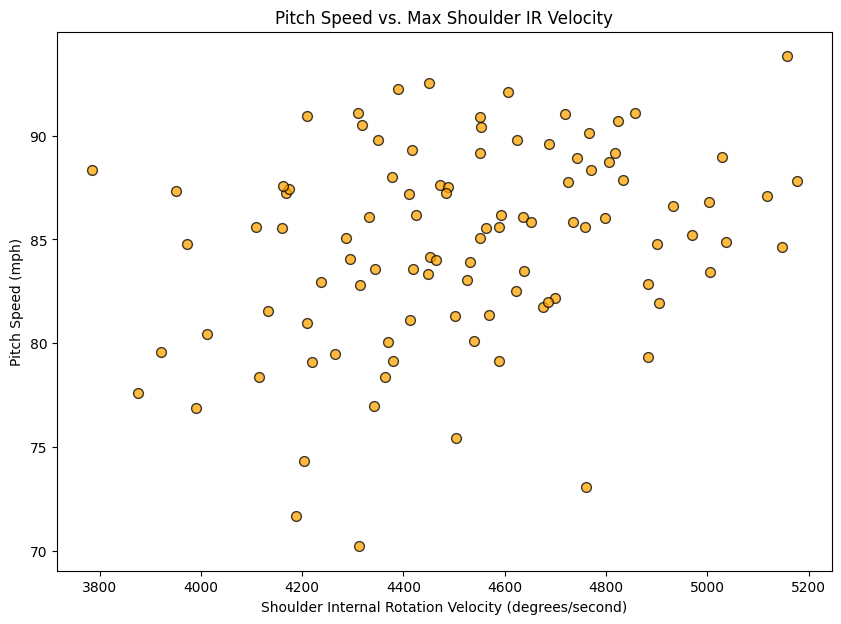

In [63]:
#make a scatterplot of max IR and pitch speed
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7), facecolor = 'white')
plt.scatter(poi_grouped['max_shoulder_internal_rotational_velo'].mean(), poi_grouped['pitch_speed_mph'].mean(), s=50,c='#ffa300', alpha = 0.75, edgecolors = 'k')
plt.xlabel("Shoulder Internal Rotation Velocity (degrees/second)")
plt.ylabel("Pitch Speed (mph)")
plt.title("Pitch Speed vs. Max Shoulder IR Velocity")

plt.show()

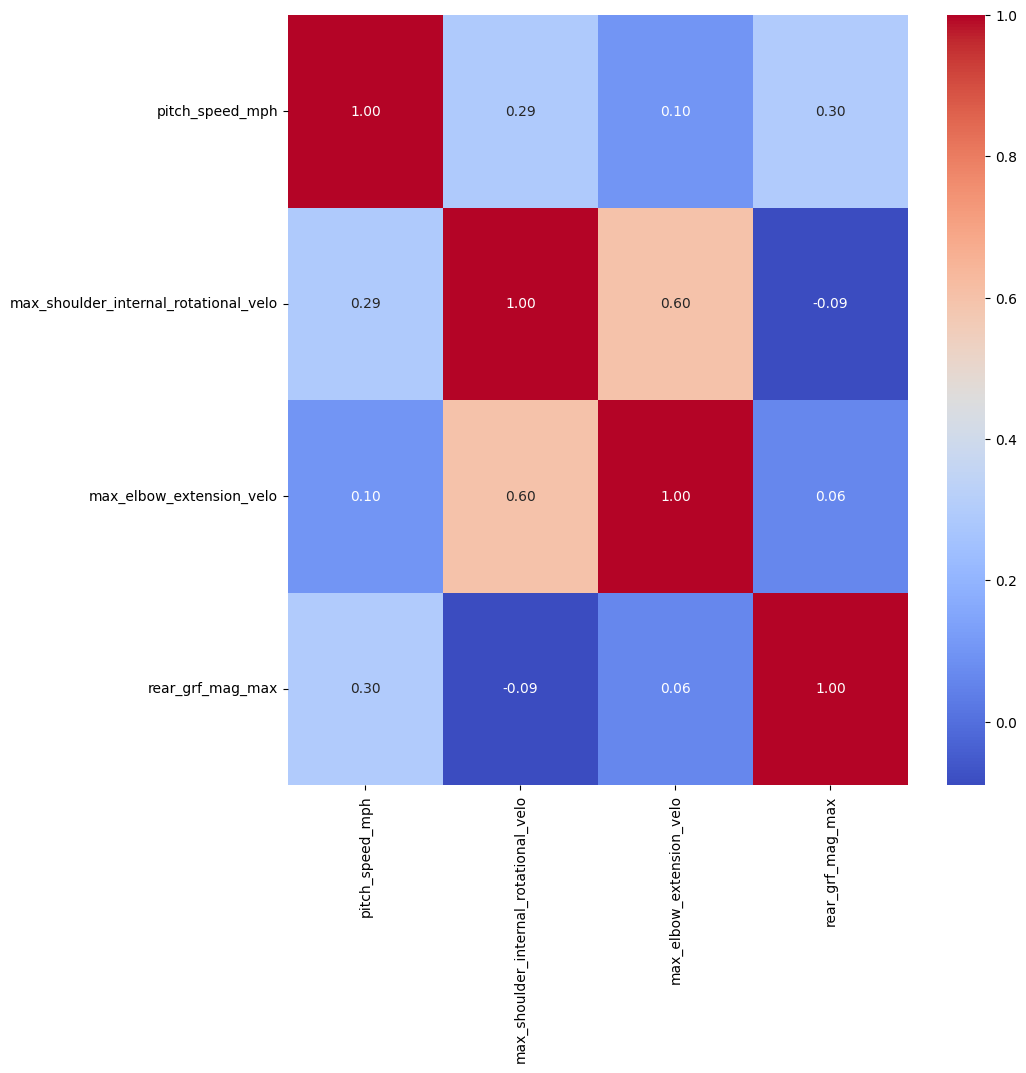

In [66]:
#alternative data visualization with correlation matrix from poi data

import seaborn as sns

#select columns of interest
columns_of_interest = ['pitch_speed_mph', 'max_shoulder_internal_rotational_velo', 'max_elbow_extension_velo', 'rear_grf_mag_max']

#create a subset dataframe of the original dataframe with only the important columns
subset_data = poi_grouped[columns_of_interest].mean()

#calculate the correlation matrix
correlation_matrix = subset_data.corr()

#visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', fmt='.2f')
plt.show()






                            OLS Regression Results                            
Dep. Variable:        pitch_speed_mph   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     11.82
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           0.000864
Time:                        23:13:14   Log-Likelihood:                -291.64
No. Observations:                 100   AIC:                             587.3
Df Residuals:                      98   BIC:                             592.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<AxesSubplot: xlabel='None', ylabel='None'>

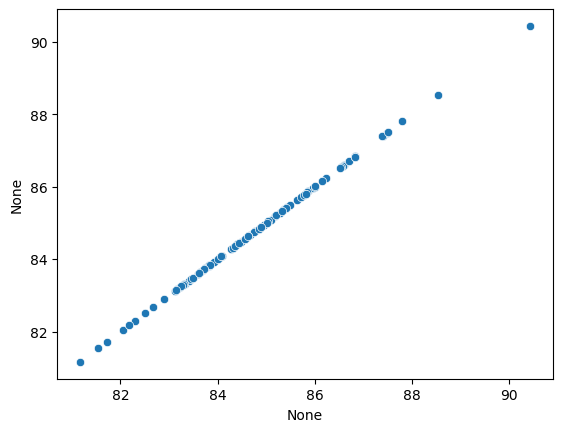

In [75]:
#build a basic regression model
import statsmodels.api as sm

#select the columns for the regression model
columns_of_interest = ['pitch_speed_mph', 'max_torso_rotational_velo', 'rear_grf_mag_max', 'lead_grf_mag_max']

#drop any rows with missing values
data = poi_grouped[columns_of_interest].mean()
data = data.dropna()

#split the data into predictor variables (x) and the target variable (y)
x = data[[
    #'max_torso_rotational_velo',
    #'rear_grf_mag_max',
    #'lead_grf_mag_max'
    'max_torso_rotational_velo'
    ]]
y = data['pitch_speed_mph']

#add a constant column to the predictor variables (x) for the intercept term
x = sm.add_constant(x)

#fit the linear regression model
model = sm.OLS(y, x).fit()

#print the summary of the model
print(model.summary())

#visualize the residuals
fig = plt.figure()
residuals = model.resid
sns.scatterplot(y=model.predict(x), x = model.fittedvalues)

#End of Step 3 of tutorial, Explore Point of Interest (POI) CSV


In [76]:
#Start of Step 4 of tutorial, Explore Full Signal Timeseries Data

# initialize python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import filedialog
from scipy import integrate
from scipy import signal

In [77]:
#simply identify file paths where data is stored

#problem here is that it's a zip file not a csv, not sure how to unzip...
force_file = r'/Users/leofeingold/Documents/GitHub/openbiomechanics/baseball_pitching/data/full_sig/force_plate.zip'
joint_angles_file = 
